# __Predicting Gym Crowdedness with Stochastic Gradient Descent on Linear Regression__

We love working out, and the gym on campus is excellent. However, it is so popular that it is often very crowded and we have to wait to use the machines we like. Luckily, we have a dataset describing the gym's crowds at determined days and hours, as well as the skills to build a model around that information.

For this project, we will use __Pandas__ to load the dataset into a dataframe, clean the data and run exploratory analyses. We will then split the data into a train and test sets, and use __SDGRegressor__ from the __Scikit Learn library__ to build and train a stochastic gradient descent linear regression model to predict how many people are at the gym on a given day from the features inputed. Finally, we will evaluate and visualize the model results using __matplotlib__.

We already have the csv file with the data in this folder.

## __Importing Libraries and Loading the Data__

Our 'Crowdedness in the Gym' dataset contains over 60,000 observations and 11 columns that contain the following information:

- `number_people`: this is the number of people at the gym at each observation. This will be our target variable or label.
- `date`: a string value with the specific date and time information.
- `timestamp`: an integer (int), with the number of seconds since the start of the day (00:00).
- `dayofweek`: an integer (int). 0 is equal to Monday and 6 is equal to Sunday.
- `is_weekend`: a Boolean value defining if this observation happened during a weekend. 1 for yes, 0 for no.
- `is_holiday`: a Boolean value defining if the observation happened during a holiday. 1 for yes, 0 for no.
- `temperature`: a float, defining the temperature during the day of the observation in Fahrenheit.
- `isstartof_semester`: a Boolean defining if the observation happened in the first 2 weeks of a semester. 1 for yes, 0 for no.
- `is_during_semester`: a Boolean defining if the observation happened during the active semester. 1 for yes, 0 for no.
- `month`: an integer (int) defining the month of the year. 1 is equal to January, 12 is equal to December.
- `hour`: an integer (int) for the hour of the day from 0 to 23.

Below, we will import the libraries we will use in this project:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.preprocessing import StandardScaler

gym = pd.read_csv('crowdness_gym_data.csv')

In [2]:
gym.head()

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,2015-08-14 17:00:11-07:00,61211,4,0,0,71.76,0,0,8,17
1,45,2015-08-14 17:20:14-07:00,62414,4,0,0,71.76,0,0,8,17
2,40,2015-08-14 17:30:15-07:00,63015,4,0,0,71.76,0,0,8,17
3,44,2015-08-14 17:40:16-07:00,63616,4,0,0,71.76,0,0,8,17
4,45,2015-08-14 17:50:17-07:00,64217,4,0,0,71.76,0,0,8,17


## __EDA and Cleaning Data__

With the dataframe loaded, we want to do some exploratory analysis to ensure everything looks in order:

In [3]:
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62184 entries, 0 to 62183
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   number_people         62184 non-null  int64  
 1   date                  62184 non-null  object 
 2   timestamp             62184 non-null  int64  
 3   day_of_week           62184 non-null  int64  
 4   is_weekend            62184 non-null  int64  
 5   is_holiday            62184 non-null  int64  
 6   temperature           62184 non-null  float64
 7   is_start_of_semester  62184 non-null  int64  
 8   is_during_semester    62184 non-null  int64  
 9   month                 62184 non-null  int64  
 10  hour                  62184 non-null  int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 5.2+ MB


In [4]:
gym.describe()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
count,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000
mean,29.072543,45799.437958,2.982504,0.282870,0.002573,58.557108,0.078831,0.660218,7.439824,12.236460
std,22.689026,24211.275891,1.996825,0.450398,0.050660,6.316396,0.269476,0.473639,3.445069,6.717631
min,0.000000,0.000000,0.000000,0.000000,0.000000,38.140000,0.000000,0.000000,1.000000,0.000000
25%,9.000000,26624.000000,1.000000,0.000000,0.000000,55.000000,0.000000,0.000000,5.000000,7.000000
50%,28.000000,46522.500000,3.000000,0.000000,0.000000,58.340000,0.000000,1.000000,8.000000,12.000000
75%,43.000000,66612.000000,5.000000,1.000000,0.000000,62.280000,0.000000,1.000000,10.000000,18.000000
max,145.000000,86399.000000,6.000000,1.000000,1.000000,87.170000,1.000000,1.000000,12.000000,23.000000


Initial observations show that this dataset contains __1 float column, 9 integer columns and 1 object column__. This 'object' column is the `date`, which is actually in time-stamp form and will need to be formatted properly. We also do not need the `timestamp` column, since there is no use to knowing the seconds since the start of the day when `hour` would be a lot more convenient.

Below, we will first drop `timestamp`, then we will format the `date` column into a date format, and finally we will plot our columns against `number_people` to try and find a linear relationship with crowdness.

In [5]:
gym = gym.drop(columns = ['timestamp'], axis = 0)

In [6]:
# convert date column to string and keep only first 10 characters (corresponding to a date)
# convert remaining string into a datetime object
from datetime import datetime
gym['date'] = gym['date'].str[:10].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

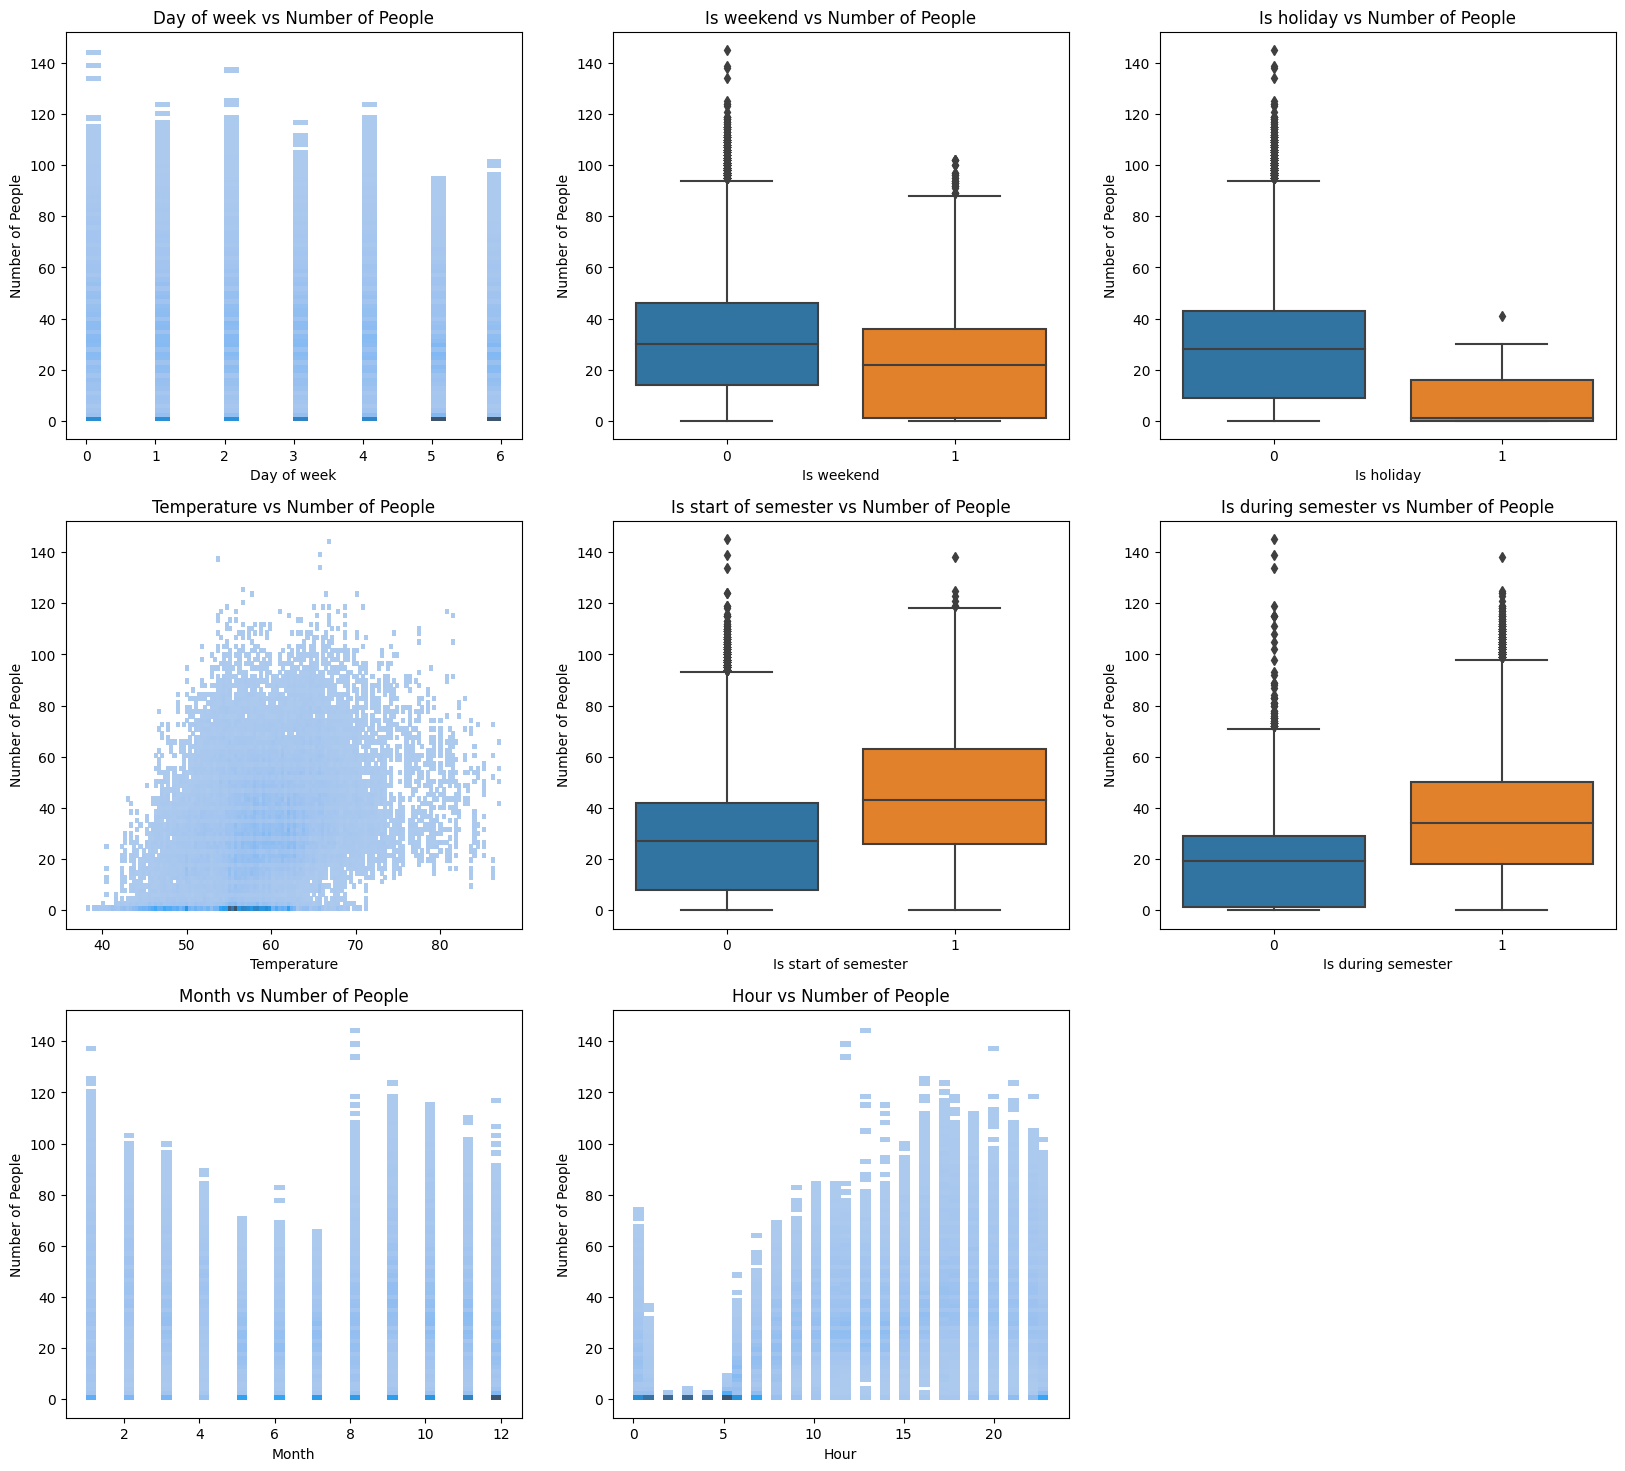

In [7]:
binary_cols = ['is_weekend', 'is_holiday', 'is_start_of_semester', 'is_during_semester']
fig = plt.figure(figsize=(20,18))
for i,col in enumerate(gym.columns[2:]):
    ax = fig.add_subplot(3, 3, i+1)
    if col in binary_cols:
        sns.boxplot(data=gym, x=col, y='number_people', ax=ax)
    else:
        sns.histplot(data=gym, x=col, y='number_people', ax=ax)
    plt.title(col.capitalize().replace('_', ' ') + ' vs Number of People')
    plt.xlabel(col.capitalize().replace('_', ' '))
    plt.ylabel('Number of People')
        
plt.show()

### __Observations:__

- __Day of Week:__ Limited effect, maybe slightly less people on the weekends
- __Is Weekend:__ Average is slightly lower during the weekends, supporting the point above
- __Is Holiday:__ Noticeably less people on average during holidays
- __Temperature:__ While the distribution is spread out, we do see more people on average on warmer temperatures
- __Is Start of Semester:__ Noticeably higher average if it's early in the semester
- __Is During Semester:__ Higher averages during the semester
- __Month:__ Peaks can be observed in January and August/September
- __Hour:__ Highest averages are in the afternoon, lowest from 2am to 5am. Interestingly, lots of people work out around mid-night

__Initial Thoughts:__ Distribution of crowdedness suggests that is the busiest early in the semester, during the afternoons and when it is warm. It is the least busy during Summer and very early in the morning. This could imply that students are highly motivated to visit the gym as the semester ends or right after New Years Eve, and drop off as they get busier later in the semester.

Let's also try plotting by day to see if any specific dates stand out:

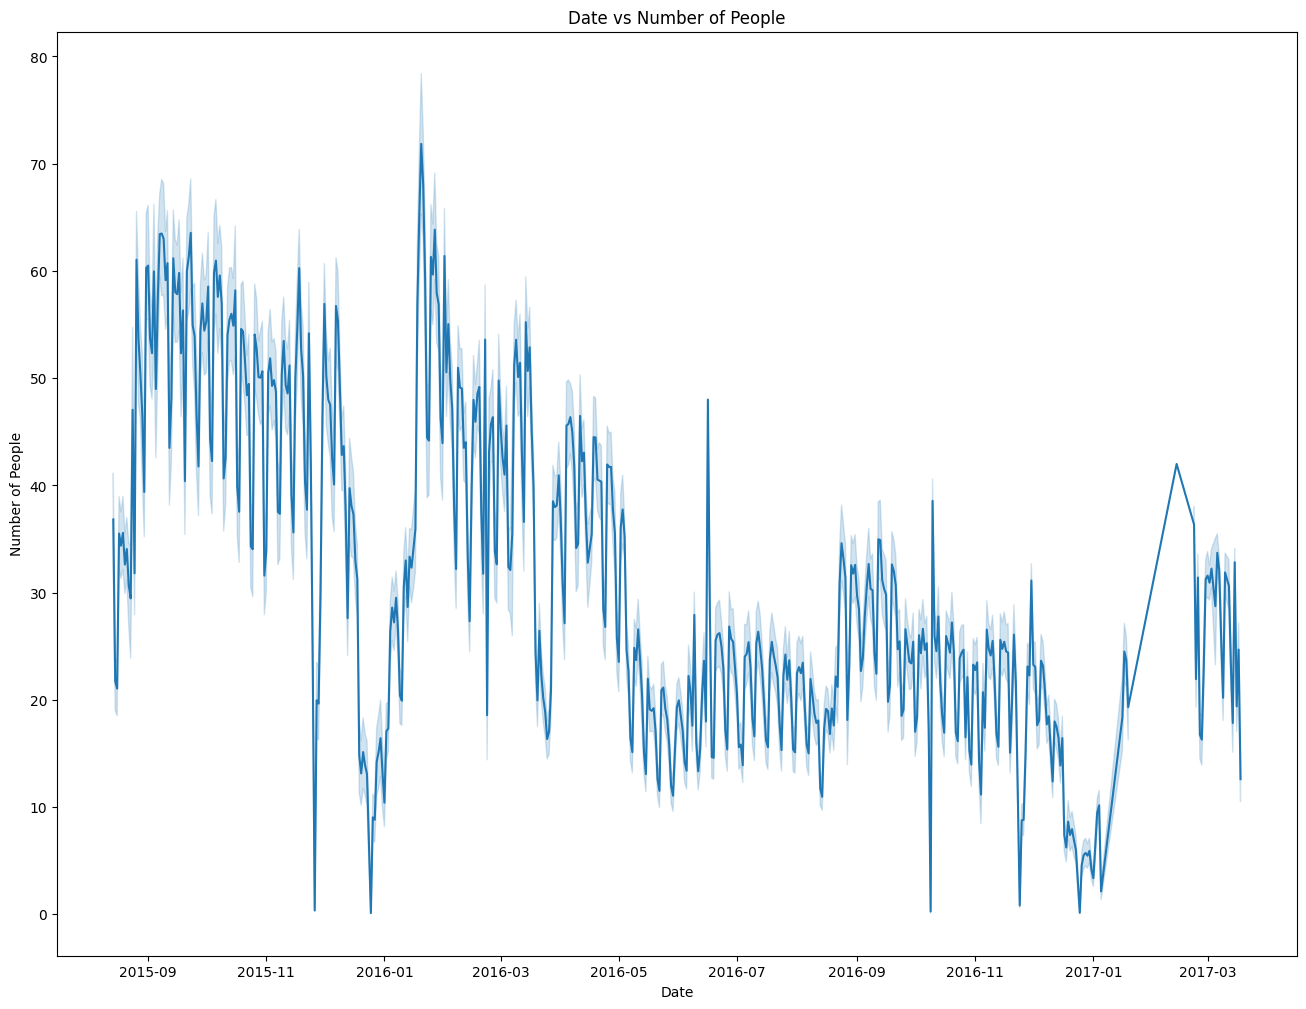

In [8]:
plt.figure(figsize=(16,12))
sns.lineplot(data=gym, x='date', y='number_people')
plt.title('Date vs Number of People')
plt.xlabel('Date')
plt.ylabel('Number of People')
plt.show()

It is hard to tell much from this chart, so we will refrain from using the `date` column. We could maybe point to large drops in December (probably Christmas) and peaks at the start of semesters (probably people crowding the gym in the first week or two of classes).

Before we build our model, we will drop `date` and take a look at the correlation between `number_people` and the rest of our remaining columns:

In [9]:
# generating correlations
gym = gym.drop(columns=['date'], axis = 0)

In [10]:
corr = gym.corr()['number_people'].sort_values(ascending=False)
print(corr)

number_people           1.000000
hour                    0.552049
temperature             0.373327
is_during_semester      0.335350
is_start_of_semester    0.182683
is_holiday             -0.048249
month                  -0.097854
day_of_week            -0.162062
is_weekend             -0.173958
Name: number_people, dtype: float64


### __Correlations:__

The columns with the largest weight on `number_people` are `hour`, `temperature` and `is_during_semester`. It is also interesting to observe that `day_of_week` and `is_weekend` have some negative correlation. Since Monday is represented as 0 and Sunday as 6 in `day_of_week`, both columns tell a similar story: people are slightly less likely to go in during the weekend.

## __Building the Model__

We have already imported the necessary libraries and functions at the start of this project. These are:

- __SGDRegressor:__ this will be your main tool to build the model.
- __Train Test Split:__ to split our data into training and testing sets.
- __Mean Square Error, Mean Absolute Error and r2_score:__ to measure the performance of the model.
- __Standard Scaler:__ for scaling (normalizing) features.

We can now start with splitting our model into training and testing sets. We will use 70% of the dataset for training:

In [11]:
# split data into target variable and the rest, and then split into training and test sets

X = gym[gym.columns[1:]]
y = gym['number_people']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [12]:
# validate size of each set
print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")
print(f"Training label shape: {y_train.shape}")
print(f"Testing label shape: {y_test.shape}")

Training features shape: (43528, 8)
Testing features shape: (18656, 8)
Training label shape: (43528,)
Testing label shape: (18656,)


Now we will build and fit the model object with `SGDRegressor`. Setting the learning rate to optimal, the loss function to hubber loss and using elasticnet for the penalty.

In [13]:
sgd_v1 = SGDRegressor(alpha=0.0001, 
                      learning_rate='optimal', 
                      loss='huber', 
                      penalty='elasticnet', 
                      random_state = 42)

sgd_v1.fit(X_train, y_train)

SGDRegressor(learning_rate='optimal', loss='huber', penalty='elasticnet',
             random_state=42)

# __Measuring the Model Performance__

With our model trained, we will now use `mean_squared_error`, `mean_absolute_error` and `r2_score` to evaluate it:

In [14]:
y_pred_v1 = sgd_v1.predict(X_test)  # Predict labels

In [15]:
# The mean squared error
print(f"Mean squared error: {round( mean_squared_error(y_test, y_pred_v1),3)}")
# Explained variance score: 1 is perfect prediction
print(f"R2 score: {round(r2_score(y_test, y_pred_v1),3)}")
# Mean Absolute Error
print(f"Mean absolute error: { round(mean_absolute_error(y_test, y_pred_v1),3)}")

Mean squared error: 304.909
R2 score: 0.408
Mean absolute error: 13.065


Initial results are not very encouraging. We obtained __MSE = 304.9__ and __Var = 13.1__. The closer these are to 0 the better, so there is room for improvement here.

We also obtained __R2 = 0.408__. This value means that only __40.8%__ of our results can be explained by the model vs by randomness, which is somewhat lacking. We will need to improve this.

Earlier we mentioned that `hour`, `temperature` and `is_during_semester` are the columns most correlated to `number_people`. These are all in very different scales, with `hour` going from 0 to 23, `temperature` from 38 to 87 and `is_during_semester` being binary. We can use __StandardScaler__ (already imported at the start of the project) to try and normalize results:

In [16]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Now we can train another model with our training sets. We will use the same `random_state` for consistency when comparing results.

In [17]:
sgd_v2 = SGDRegressor(alpha=0.0001, 
                      learning_rate='optimal', 
                      loss='huber', 
                      penalty='elasticnet', 
                      random_state = 42)

sgd_v2.fit(X_train_scaled, y_train)

y_pred_v2 = sgd_v2.predict(X_test_scaled)  # Predict labels
# The mean squared error
print(f"Mean squared error: {round( mean_squared_error(y_test, y_pred_v2),3)}")
# Explained variance score: 1 is perfect prediction
print(f"R2 score: {round(r2_score(y_test, y_pred_v2),3)}")
# Mean Absolute Error
print(f"Mean absolute error: { round(mean_absolute_error(y_test, y_pred_v2),3)}")

Mean squared error: 254.394
R2 score: 0.506
Mean absolute error: 12.041


With the scaled data, the model performs slightly __better__, decresing the Mean Squared Error and Mean Absolute Error and increasing the R2 score by 0.008.

## __Visualizing Results__

A good way to understand how our predictions performed and how they differ from the real values is by plotting these two together. Since we are using a linear-regression model, a line-plot seems like the appropriate function to do so. We will display the number of iterations in the X axis and the predicted and original values in the Y axis. The places where both charts overlap is where the prediction worked, and the rest is where the model performed poorly.

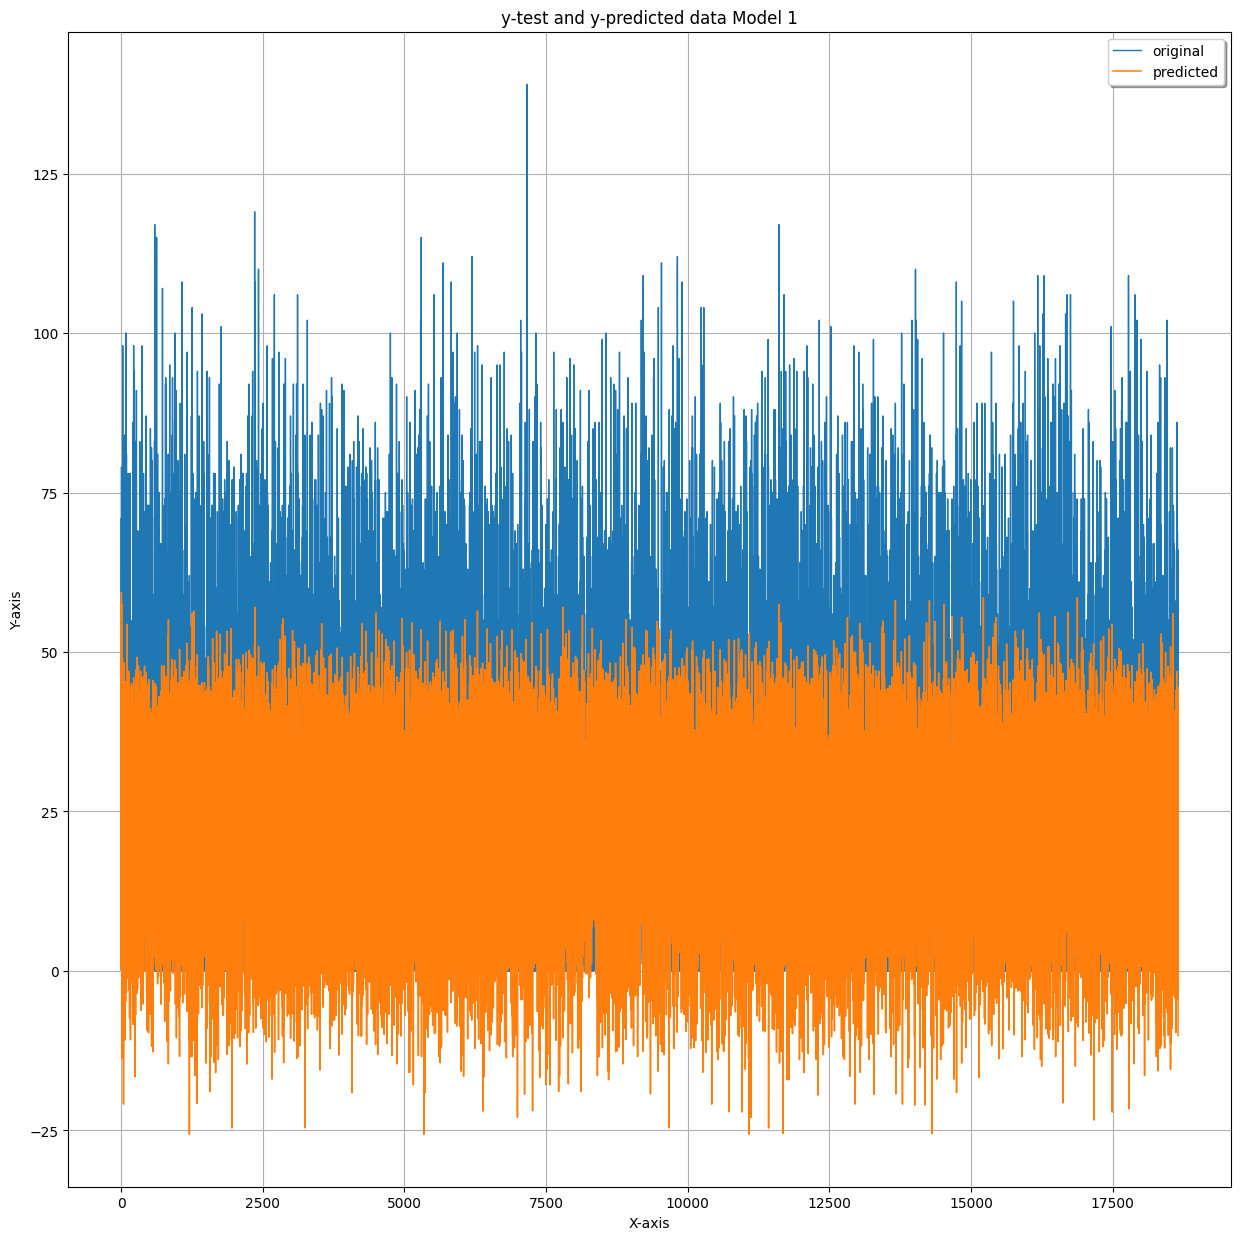

In [21]:
plt.figure(figsize=(15, 15))

x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, y_pred_v1, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data Model 1")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

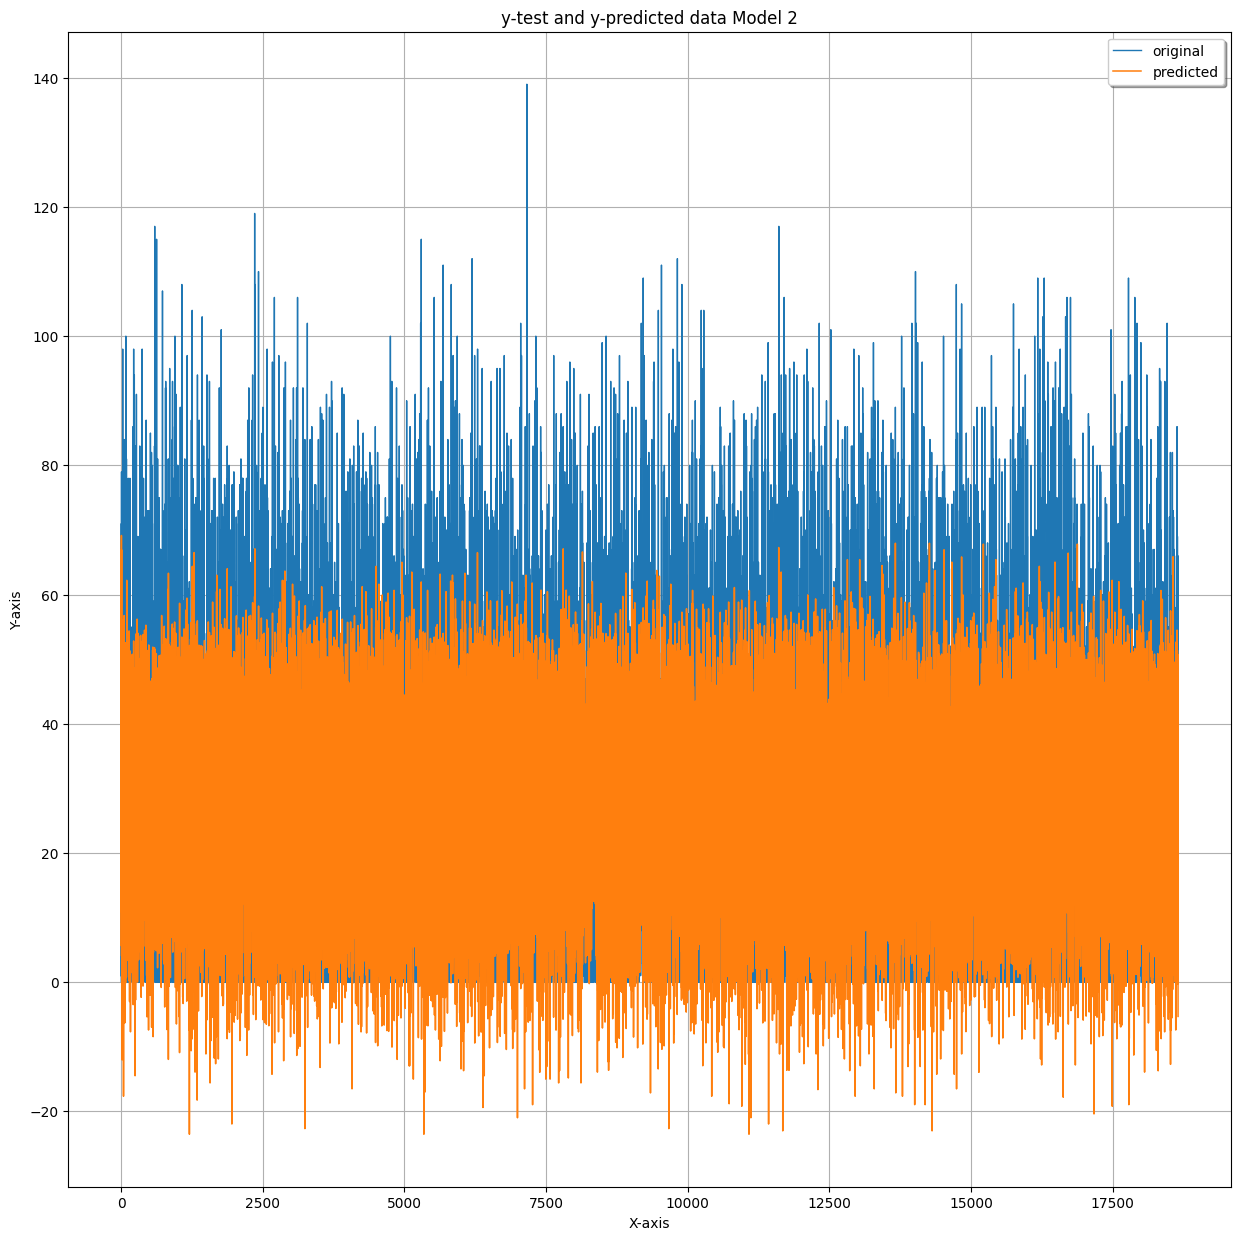

In [22]:
# Model v2

plt.figure(figsize=(15, 15))

x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, y_pred_v2, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data Model 2")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

## __Results__

We can clearly see there is a lot of room for improvement. However, a linear regression model using Stochastic Gradient Descent is a good place to start for building such a prediction model.

We can improve the model by making some changes. Regarding the data, I decided to remove the timestamp variable since I believed it to be redundant, nonetheless, maybe that redundancy might help the model get higher accuracy.

Also, I might testi other hyperparameters that might be interesting, such as changing the loss function and maybe exploring changing the learning rate and penalty.

In general, from the data and the model, for someone like me who likes to go to the gym often without having too many people there, any day at 5am seems like a safe bet.